In [1]:
import os
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
os.chdir('drive/My Drive/Colab Notebooks/hyperpreferentialattachment')

In [3]:
import torch
import numpy as np
from src.MLP import MultiLayerPerceptron as MLP
import pandas as pd
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt

In [6]:
#data = pd.read_csv('processed_data/no_update.csv')
#data = pd.read_csv('processed_data/15000update.csv')
# data = pd.read_csv('processed_data/25000update.csv')
data = pd.read_csv('processed_data/2000update_200threshold.csv')

train_size = int(0.7*len(data))
dataX = data[['Degree_difference','Max_degree', 'Avg_degree', 'MIN_distance', 'Avg_cluster_coef',
             'Avg_jaccard', 'Hyper_jaccard', 'Adamic_adar']]
dataY = data[['Answer']]

trainX= torch.Tensor(dataX[:train_size].values)
testX = torch.Tensor(dataX[train_size:].values)
trainY= torch.Tensor(dataY[:train_size].values)
testY = torch.Tensor(dataY[train_size:].values)
train_data = torch.utils.data.TensorDataset(trainX, trainY)
test_data = torch.utils.data.TensorDataset(testX, testY)
trainloader = DataLoader(train_data ,batch_size=1000, shuffle=True)
testloader = DataLoader(test_data ,batch_size=1000, shuffle=True)

tensor(40.2039, grad_fn=<AddBackward0>)
tensor(16.9346, grad_fn=<AddBackward0>)
tensor(15.6447, grad_fn=<AddBackward0>)
tensor(15.2483, grad_fn=<AddBackward0>)
tensor(14.9822, grad_fn=<AddBackward0>)
tensor(14.8339, grad_fn=<AddBackward0>)
tensor(14.5216, grad_fn=<AddBackward0>)
tensor(14.4497, grad_fn=<AddBackward0>)
tensor(14.3980, grad_fn=<AddBackward0>)
tensor(14.3414, grad_fn=<AddBackward0>)
tensor(14.3089, grad_fn=<AddBackward0>)
tensor(14.2405, grad_fn=<AddBackward0>)
tensor(14.1561, grad_fn=<AddBackward0>)
tensor(14.1448, grad_fn=<AddBackward0>)
tensor(14.1062, grad_fn=<AddBackward0>)
tensor(14.0218, grad_fn=<AddBackward0>)
tensor(13.9289, grad_fn=<AddBackward0>)
tensor(13.9193, grad_fn=<AddBackward0>)
tensor(13.8445, grad_fn=<AddBackward0>)
tensor(13.8079, grad_fn=<AddBackward0>)
tensor(13.9157, grad_fn=<AddBackward0>)
tensor(13.7627, grad_fn=<AddBackward0>)
tensor(13.7134, grad_fn=<AddBackward0>)
tensor(13.7093, grad_fn=<AddBackward0>)
tensor(13.6959, grad_fn=<AddBackward0>)


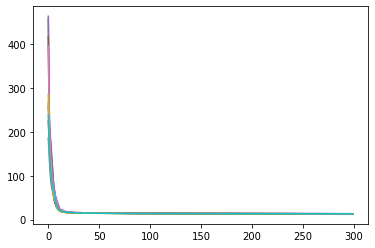

In [7]:
import pickle
result = []
for i in range(10):
    model = MLP(input_dimension = 8,
            output_dimension = 1,
            num_neurons = [64, 64],
            activation='mish',
            out_activation='Sigmoid',
            dropout_probability=0.05)
    epochs = 300
    lr = 1e-3

    opt = torch.optim.Adam(model.parameters(), lr)
    criterion = torch.nn.BCELoss()

    loss_record = []
    for epoch in range(1,epochs+1):
        total_loss = 0 
        
        for x, y in trainloader:
            output = model(x)
            loss = criterion(output, y)
            opt.zero_grad()
            loss.backward()
            opt.step()
            total_loss += loss
        
        loss_record.append(total_loss)
        if epoch % 10 == 0:
            print(total_loss)
        
    plt.plot(loss_record)

    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for x, y in testloader:
        pred = model(x)
        pred = torch.round(pred)
        
        tp += torch.sum((pred==1) & (y==1))
        fn += torch.sum((pred==0) & (y==1))
        fp += torch.sum((pred==1) & (y==0))
        tn += torch.sum((pred==0) & (y==0))
        
    acc = np.array(tp+tn)/np.array((tp+tn+fp+fn))
    precison = np.array(tp)/np.array((tp+fp))
    recall = np.array(tp)/np.array((tp+fn))
    f1_score = 2*precison*recall/(precison+recall)

    result.append([acc,precison, recall, f1_score])

sum_acc = 0
sum_precision = 0
sum_recall = 0
sum_f1_score = 0
for i in range(10):
    sum_acc += result[i][0]
    sum_precision += result[i][1]
    sum_recall += result[i][2]
    sum_f1_score += result[i][3]
print(sum_acc/10, sum_precision/10, sum_recall/10, sum_f1_score/10)

with open('2000_200_300.pickle', 'wb') as f:
    pickle.dump(result, f)

In [8]:
#data = pd.read_csv('processed_data/no_update.csv')
#data = pd.read_csv('processed_data/15000update.csv')
# data = pd.read_csv('processed_data/25000update.csv')
data = pd.read_csv('processed_data/2000update_250threshold.csv')

train_size = int(0.7*len(data))
dataX = data[['Degree_difference','Max_degree', 'Avg_degree', 'MIN_distance', 'Avg_cluster_coef',
             'Avg_jaccard', 'Hyper_jaccard', 'Adamic_adar']]
dataY = data[['Answer']]

trainX= torch.Tensor(dataX[:train_size].values)
testX = torch.Tensor(dataX[train_size:].values)
trainY= torch.Tensor(dataY[:train_size].values)
testY = torch.Tensor(dataY[train_size:].values)
train_data = torch.utils.data.TensorDataset(trainX, trainY)
test_data = torch.utils.data.TensorDataset(testX, testY)
trainloader = DataLoader(train_data ,batch_size=1000, shuffle=True)
testloader = DataLoader(test_data ,batch_size=1000, shuffle=True)

tensor(40.9759, grad_fn=<AddBackward0>)
tensor(16.8181, grad_fn=<AddBackward0>)
tensor(15.5282, grad_fn=<AddBackward0>)
tensor(15.0015, grad_fn=<AddBackward0>)
tensor(14.6900, grad_fn=<AddBackward0>)
tensor(14.5889, grad_fn=<AddBackward0>)
tensor(14.4380, grad_fn=<AddBackward0>)
tensor(14.3542, grad_fn=<AddBackward0>)
tensor(14.1902, grad_fn=<AddBackward0>)
tensor(14.1904, grad_fn=<AddBackward0>)
tensor(14.1123, grad_fn=<AddBackward0>)
tensor(14.0987, grad_fn=<AddBackward0>)
tensor(14.0197, grad_fn=<AddBackward0>)
tensor(13.9654, grad_fn=<AddBackward0>)
tensor(13.8833, grad_fn=<AddBackward0>)
tensor(13.8466, grad_fn=<AddBackward0>)
tensor(13.9062, grad_fn=<AddBackward0>)
tensor(13.7068, grad_fn=<AddBackward0>)
tensor(13.6813, grad_fn=<AddBackward0>)
tensor(13.6896, grad_fn=<AddBackward0>)
tensor(13.6515, grad_fn=<AddBackward0>)
tensor(13.6187, grad_fn=<AddBackward0>)
tensor(13.5693, grad_fn=<AddBackward0>)
tensor(13.5329, grad_fn=<AddBackward0>)
tensor(13.5627, grad_fn=<AddBackward0>)


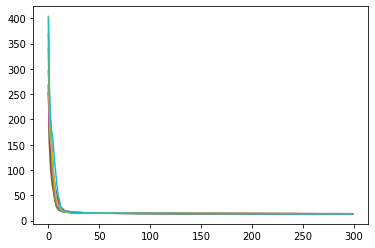

In [9]:
import pickle
result = []
for i in range(10):
    model = MLP(input_dimension = 8,
            output_dimension = 1,
            num_neurons = [64, 64],
            activation='mish',
            out_activation='Sigmoid',
            dropout_probability=0.05)
    epochs = 300
    lr = 1e-3

    opt = torch.optim.Adam(model.parameters(), lr)
    criterion = torch.nn.BCELoss()

    loss_record = []
    for epoch in range(1,epochs+1):
        total_loss = 0 
        
        for x, y in trainloader:
            output = model(x)
            loss = criterion(output, y)
            opt.zero_grad()
            loss.backward()
            opt.step()
            total_loss += loss
        
        loss_record.append(total_loss)
        if epoch % 10 == 0:
            print(total_loss)
        
    plt.plot(loss_record)

    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for x, y in testloader:
        pred = model(x)
        pred = torch.round(pred)
        
        tp += torch.sum((pred==1) & (y==1))
        fn += torch.sum((pred==0) & (y==1))
        fp += torch.sum((pred==1) & (y==0))
        tn += torch.sum((pred==0) & (y==0))
        
    acc = np.array(tp+tn)/np.array((tp+tn+fp+fn))
    precison = np.array(tp)/np.array((tp+fp))
    recall = np.array(tp)/np.array((tp+fn))
    f1_score = 2*precison*recall/(precison+recall)

    result.append([acc,precison, recall, f1_score])

sum_acc = 0
sum_precision = 0
sum_recall = 0
sum_f1_score = 0
for i in range(10):
    sum_acc += result[i][0]
    sum_precision += result[i][1]
    sum_recall += result[i][2]
    sum_f1_score += result[i][3]
print(sum_acc/10, sum_precision/10, sum_recall/10, sum_f1_score/10)

with open('2000_250_300.pickle', 'wb') as f:
    pickle.dump(result, f)

In [10]:
#data = pd.read_csv('processed_data/no_update.csv')
#data = pd.read_csv('processed_data/15000update.csv')
# data = pd.read_csv('processed_data/25000update.csv')
data = pd.read_csv('processed_data/2000update_150threshold.csv')

train_size = int(0.7*len(data))
dataX = data[['Degree_difference','Max_degree', 'Avg_degree', 'MIN_distance', 'Avg_cluster_coef',
             'Avg_jaccard', 'Hyper_jaccard', 'Adamic_adar']]
dataY = data[['Answer']]

trainX= torch.Tensor(dataX[:train_size].values)
testX = torch.Tensor(dataX[train_size:].values)
trainY= torch.Tensor(dataY[:train_size].values)
testY = torch.Tensor(dataY[train_size:].values)
train_data = torch.utils.data.TensorDataset(trainX, trainY)
test_data = torch.utils.data.TensorDataset(testX, testY)
trainloader = DataLoader(train_data ,batch_size=1000, shuffle=True)
testloader = DataLoader(test_data ,batch_size=1000, shuffle=True)

tensor(29.4020, grad_fn=<AddBackward0>)
tensor(16.4578, grad_fn=<AddBackward0>)
tensor(15.4756, grad_fn=<AddBackward0>)
tensor(15.1035, grad_fn=<AddBackward0>)
tensor(14.7749, grad_fn=<AddBackward0>)
tensor(14.5330, grad_fn=<AddBackward0>)
tensor(14.4078, grad_fn=<AddBackward0>)
tensor(14.1989, grad_fn=<AddBackward0>)
tensor(14.1700, grad_fn=<AddBackward0>)
tensor(13.9646, grad_fn=<AddBackward0>)
tensor(13.9662, grad_fn=<AddBackward0>)
tensor(13.8637, grad_fn=<AddBackward0>)
tensor(13.8226, grad_fn=<AddBackward0>)
tensor(13.6931, grad_fn=<AddBackward0>)
tensor(13.6999, grad_fn=<AddBackward0>)
tensor(13.7006, grad_fn=<AddBackward0>)
tensor(13.6327, grad_fn=<AddBackward0>)
tensor(13.5933, grad_fn=<AddBackward0>)
tensor(13.5012, grad_fn=<AddBackward0>)
tensor(13.4502, grad_fn=<AddBackward0>)
tensor(13.3978, grad_fn=<AddBackward0>)
tensor(13.3851, grad_fn=<AddBackward0>)
tensor(13.4244, grad_fn=<AddBackward0>)
tensor(13.2577, grad_fn=<AddBackward0>)
tensor(13.2817, grad_fn=<AddBackward0>)


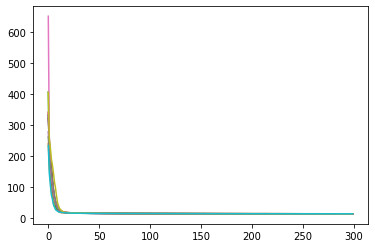

In [11]:
import pickle
result = []
for i in range(10):
    model = MLP(input_dimension = 8,
            output_dimension = 1,
            num_neurons = [64, 64],
            activation='mish',
            out_activation='Sigmoid',
            dropout_probability=0.05)
    epochs = 300
    lr = 1e-3

    opt = torch.optim.Adam(model.parameters(), lr)
    criterion = torch.nn.BCELoss()

    loss_record = []
    for epoch in range(1,epochs+1):
        total_loss = 0 
        
        for x, y in trainloader:
            output = model(x)
            loss = criterion(output, y)
            opt.zero_grad()
            loss.backward()
            opt.step()
            total_loss += loss
        
        loss_record.append(total_loss)
        if epoch % 10 == 0:
            print(total_loss)
        
    plt.plot(loss_record)

    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for x, y in testloader:
        pred = model(x)
        pred = torch.round(pred)
        
        tp += torch.sum((pred==1) & (y==1))
        fn += torch.sum((pred==0) & (y==1))
        fp += torch.sum((pred==1) & (y==0))
        tn += torch.sum((pred==0) & (y==0))
        
    acc = np.array(tp+tn)/np.array((tp+tn+fp+fn))
    precison = np.array(tp)/np.array((tp+fp))
    recall = np.array(tp)/np.array((tp+fn))
    f1_score = 2*precison*recall/(precison+recall)

    result.append([acc,precison, recall, f1_score])

sum_acc = 0
sum_precision = 0
sum_recall = 0
sum_f1_score = 0
for i in range(10):
    sum_acc += result[i][0]
    sum_precision += result[i][1]
    sum_recall += result[i][2]
    sum_f1_score += result[i][3]
print(sum_acc/10, sum_precision/10, sum_recall/10, sum_f1_score/10)

with open('2000_150_300.pickle', 'wb') as f:
    pickle.dump(result, f)

In [12]:
#data = pd.read_csv('processed_data/no_update.csv')
#data = pd.read_csv('processed_data/15000update.csv')
# data = pd.read_csv('processed_data/25000update.csv')
data = pd.read_csv('processed_data/2000update_350threshold.csv')

train_size = int(0.7*len(data))
dataX = data[['Degree_difference','Max_degree', 'Avg_degree', 'MIN_distance', 'Avg_cluster_coef',
             'Avg_jaccard', 'Hyper_jaccard', 'Adamic_adar']]
dataY = data[['Answer']]

trainX= torch.Tensor(dataX[:train_size].values)
testX = torch.Tensor(dataX[train_size:].values)
trainY= torch.Tensor(dataY[:train_size].values)
testY = torch.Tensor(dataY[train_size:].values)
train_data = torch.utils.data.TensorDataset(trainX, trainY)
test_data = torch.utils.data.TensorDataset(testX, testY)
trainloader = DataLoader(train_data ,batch_size=1000, shuffle=True)
testloader = DataLoader(test_data ,batch_size=1000, shuffle=True)

tensor(59.6309, grad_fn=<AddBackward0>)
tensor(19.7733, grad_fn=<AddBackward0>)
tensor(16.0417, grad_fn=<AddBackward0>)
tensor(15.2566, grad_fn=<AddBackward0>)
tensor(14.7882, grad_fn=<AddBackward0>)
tensor(14.5360, grad_fn=<AddBackward0>)
tensor(14.4884, grad_fn=<AddBackward0>)
tensor(14.2793, grad_fn=<AddBackward0>)
tensor(14.1081, grad_fn=<AddBackward0>)
tensor(14.1436, grad_fn=<AddBackward0>)
tensor(13.9980, grad_fn=<AddBackward0>)
tensor(13.8875, grad_fn=<AddBackward0>)
tensor(13.8788, grad_fn=<AddBackward0>)
tensor(13.8002, grad_fn=<AddBackward0>)
tensor(13.6858, grad_fn=<AddBackward0>)
tensor(13.7594, grad_fn=<AddBackward0>)
tensor(13.6478, grad_fn=<AddBackward0>)
tensor(13.6433, grad_fn=<AddBackward0>)
tensor(13.5561, grad_fn=<AddBackward0>)
tensor(13.5749, grad_fn=<AddBackward0>)
tensor(13.4696, grad_fn=<AddBackward0>)
tensor(13.4776, grad_fn=<AddBackward0>)
tensor(13.4463, grad_fn=<AddBackward0>)
tensor(13.4350, grad_fn=<AddBackward0>)
tensor(13.3812, grad_fn=<AddBackward0>)


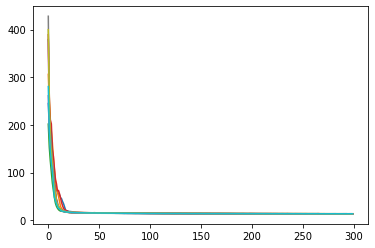

In [13]:
import pickle
result = []
for i in range(10):
    model = MLP(input_dimension = 8,
            output_dimension = 1,
            num_neurons = [64, 64],
            activation='mish',
            out_activation='Sigmoid',
            dropout_probability=0.05)
    epochs = 300
    lr = 1e-3

    opt = torch.optim.Adam(model.parameters(), lr)
    criterion = torch.nn.BCELoss()

    loss_record = []
    for epoch in range(1,epochs+1):
        total_loss = 0 
        
        for x, y in trainloader:
            output = model(x)
            loss = criterion(output, y)
            opt.zero_grad()
            loss.backward()
            opt.step()
            total_loss += loss
        
        loss_record.append(total_loss)
        if epoch % 10 == 0:
            print(total_loss)
        
    plt.plot(loss_record)

    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for x, y in testloader:
        pred = model(x)
        pred = torch.round(pred)
        
        tp += torch.sum((pred==1) & (y==1))
        fn += torch.sum((pred==0) & (y==1))
        fp += torch.sum((pred==1) & (y==0))
        tn += torch.sum((pred==0) & (y==0))
        
    acc = np.array(tp+tn)/np.array((tp+tn+fp+fn))
    precison = np.array(tp)/np.array((tp+fp))
    recall = np.array(tp)/np.array((tp+fn))
    f1_score = 2*precison*recall/(precison+recall)

    result.append([acc,precison, recall, f1_score])

sum_acc = 0
sum_precision = 0
sum_recall = 0
sum_f1_score = 0
for i in range(10):
    sum_acc += result[i][0]
    sum_precision += result[i][1]
    sum_recall += result[i][2]
    sum_f1_score += result[i][3]
print(sum_acc/10, sum_precision/10, sum_recall/10, sum_f1_score/10)

with open('2000_350_300.pickle', 'wb') as f:
    pickle.dump(result, f)

In [14]:
#data = pd.read_csv('processed_data/no_update.csv')
#data = pd.read_csv('processed_data/15000update.csv')
# data = pd.read_csv('processed_data/25000update.csv')
data = pd.read_csv('processed_data/15000update_200threshold.csv')

train_size = int(0.7*len(data))
dataX = data[['Degree_difference','Max_degree', 'Avg_degree', 'MIN_distance', 'Avg_cluster_coef',
             'Avg_jaccard', 'Hyper_jaccard', 'Adamic_adar']]
dataY = data[['Answer']]

trainX= torch.Tensor(dataX[:train_size].values)
testX = torch.Tensor(dataX[train_size:].values)
trainY= torch.Tensor(dataY[:train_size].values)
testY = torch.Tensor(dataY[train_size:].values)
train_data = torch.utils.data.TensorDataset(trainX, trainY)
test_data = torch.utils.data.TensorDataset(testX, testY)
trainloader = DataLoader(train_data ,batch_size=1000, shuffle=True)
testloader = DataLoader(test_data ,batch_size=1000, shuffle=True)

tensor(62.6890, grad_fn=<AddBackward0>)
tensor(19.0502, grad_fn=<AddBackward0>)
tensor(16.0050, grad_fn=<AddBackward0>)
tensor(15.2710, grad_fn=<AddBackward0>)
tensor(14.8264, grad_fn=<AddBackward0>)
tensor(14.6015, grad_fn=<AddBackward0>)
tensor(14.4972, grad_fn=<AddBackward0>)
tensor(14.4071, grad_fn=<AddBackward0>)
tensor(14.2955, grad_fn=<AddBackward0>)
tensor(14.2423, grad_fn=<AddBackward0>)
tensor(14.0608, grad_fn=<AddBackward0>)
tensor(14.0375, grad_fn=<AddBackward0>)
tensor(13.9341, grad_fn=<AddBackward0>)
tensor(13.9420, grad_fn=<AddBackward0>)
tensor(13.8935, grad_fn=<AddBackward0>)
tensor(13.8913, grad_fn=<AddBackward0>)
tensor(13.7873, grad_fn=<AddBackward0>)
tensor(13.7417, grad_fn=<AddBackward0>)
tensor(13.6807, grad_fn=<AddBackward0>)
tensor(13.7747, grad_fn=<AddBackward0>)
tensor(13.8226, grad_fn=<AddBackward0>)
tensor(13.6449, grad_fn=<AddBackward0>)
tensor(13.5925, grad_fn=<AddBackward0>)
tensor(13.5808, grad_fn=<AddBackward0>)
tensor(13.5343, grad_fn=<AddBackward0>)


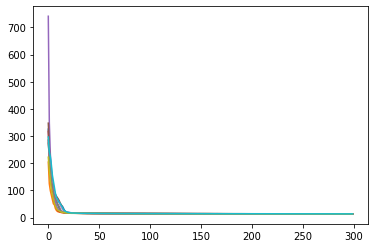

In [15]:
import pickle
result = []
for i in range(10):
    model = MLP(input_dimension = 8,
            output_dimension = 1,
            num_neurons = [64, 64],
            activation='mish',
            out_activation='Sigmoid',
            dropout_probability=0.05)
    epochs = 300
    lr = 1e-3

    opt = torch.optim.Adam(model.parameters(), lr)
    criterion = torch.nn.BCELoss()

    loss_record = []
    for epoch in range(1,epochs+1):
        total_loss = 0 
        
        for x, y in trainloader:
            output = model(x)
            loss = criterion(output, y)
            opt.zero_grad()
            loss.backward()
            opt.step()
            total_loss += loss
        
        loss_record.append(total_loss)
        if epoch % 10 == 0:
            print(total_loss)
        
    plt.plot(loss_record)

    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for x, y in testloader:
        pred = model(x)
        pred = torch.round(pred)
        
        tp += torch.sum((pred==1) & (y==1))
        fn += torch.sum((pred==0) & (y==1))
        fp += torch.sum((pred==1) & (y==0))
        tn += torch.sum((pred==0) & (y==0))
        
    acc = np.array(tp+tn)/np.array((tp+tn+fp+fn))
    precison = np.array(tp)/np.array((tp+fp))
    recall = np.array(tp)/np.array((tp+fn))
    f1_score = 2*precison*recall/(precison+recall)

    result.append([acc,precison, recall, f1_score])

sum_acc = 0
sum_precision = 0
sum_recall = 0
sum_f1_score = 0
for i in range(10):
    sum_acc += result[i][0]
    sum_precision += result[i][1]
    sum_recall += result[i][2]
    sum_f1_score += result[i][3]
print(sum_acc/10, sum_precision/10, sum_recall/10, sum_f1_score/10)

with open('15000_200_300.pickle', 'wb') as f:
    pickle.dump(result, f)

In [16]:
#data = pd.read_csv('processed_data/no_update.csv')
#data = pd.read_csv('processed_data/15000update.csv')
# data = pd.read_csv('processed_data/25000update.csv')
data = pd.read_csv('processed_data/5000update_200threshold.csv')

train_size = int(0.7*len(data))
dataX = data[['Degree_difference','Max_degree', 'Avg_degree', 'MIN_distance', 'Avg_cluster_coef',
             'Avg_jaccard', 'Hyper_jaccard', 'Adamic_adar']]
dataY = data[['Answer']]

trainX= torch.Tensor(dataX[:train_size].values)
testX = torch.Tensor(dataX[train_size:].values)
trainY= torch.Tensor(dataY[:train_size].values)
testY = torch.Tensor(dataY[train_size:].values)
train_data = torch.utils.data.TensorDataset(trainX, trainY)
test_data = torch.utils.data.TensorDataset(testX, testY)
trainloader = DataLoader(train_data ,batch_size=1000, shuffle=True)
testloader = DataLoader(test_data ,batch_size=1000, shuffle=True)

tensor(37.6393, grad_fn=<AddBackward0>)
tensor(16.5611, grad_fn=<AddBackward0>)
tensor(15.6799, grad_fn=<AddBackward0>)
tensor(15.4451, grad_fn=<AddBackward0>)
tensor(15.2337, grad_fn=<AddBackward0>)
tensor(15.1062, grad_fn=<AddBackward0>)
tensor(14.8289, grad_fn=<AddBackward0>)
tensor(14.6152, grad_fn=<AddBackward0>)
tensor(14.5416, grad_fn=<AddBackward0>)
tensor(14.4054, grad_fn=<AddBackward0>)
tensor(14.2756, grad_fn=<AddBackward0>)
tensor(14.2419, grad_fn=<AddBackward0>)
tensor(14.1782, grad_fn=<AddBackward0>)
tensor(14.1023, grad_fn=<AddBackward0>)
tensor(14.2251, grad_fn=<AddBackward0>)
tensor(14.1148, grad_fn=<AddBackward0>)
tensor(14.0550, grad_fn=<AddBackward0>)
tensor(13.9342, grad_fn=<AddBackward0>)
tensor(13.8853, grad_fn=<AddBackward0>)
tensor(13.9276, grad_fn=<AddBackward0>)
tensor(13.9373, grad_fn=<AddBackward0>)
tensor(13.8060, grad_fn=<AddBackward0>)
tensor(13.7823, grad_fn=<AddBackward0>)
tensor(13.6355, grad_fn=<AddBackward0>)
tensor(13.6136, grad_fn=<AddBackward0>)


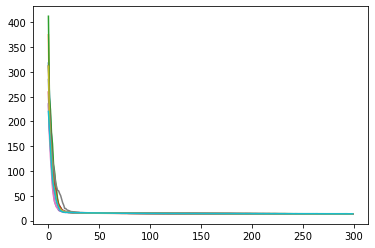

In [17]:
import pickle
result = []
for i in range(10):
    model = MLP(input_dimension = 8,
            output_dimension = 1,
            num_neurons = [64, 64],
            activation='mish',
            out_activation='Sigmoid',
            dropout_probability=0.05)
    epochs = 300
    lr = 1e-3

    opt = torch.optim.Adam(model.parameters(), lr)
    criterion = torch.nn.BCELoss()

    loss_record = []
    for epoch in range(1,epochs+1):
        total_loss = 0 
        
        for x, y in trainloader:
            output = model(x)
            loss = criterion(output, y)
            opt.zero_grad()
            loss.backward()
            opt.step()
            total_loss += loss
        
        loss_record.append(total_loss)
        if epoch % 10 == 0:
            print(total_loss)
        
    plt.plot(loss_record)

    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for x, y in testloader:
        pred = model(x)
        pred = torch.round(pred)
        
        tp += torch.sum((pred==1) & (y==1))
        fn += torch.sum((pred==0) & (y==1))
        fp += torch.sum((pred==1) & (y==0))
        tn += torch.sum((pred==0) & (y==0))
        
    acc = np.array(tp+tn)/np.array((tp+tn+fp+fn))
    precison = np.array(tp)/np.array((tp+fp))
    recall = np.array(tp)/np.array((tp+fn))
    f1_score = 2*precison*recall/(precison+recall)

    result.append([acc,precison, recall, f1_score])

sum_acc = 0
sum_precision = 0
sum_recall = 0
sum_f1_score = 0
for i in range(10):
    sum_acc += result[i][0]
    sum_precision += result[i][1]
    sum_recall += result[i][2]
    sum_f1_score += result[i][3]
print(sum_acc/10, sum_precision/10, sum_recall/10, sum_f1_score/10)

with open('5000_200_300.pickle', 'wb') as f:
    pickle.dump(result, f)

tensor(21.5164, grad_fn=<AddBackward0>)
tensor(16.1590, grad_fn=<AddBackward0>)
tensor(15.1892, grad_fn=<AddBackward0>)
tensor(14.8788, grad_fn=<AddBackward0>)
tensor(14.7305, grad_fn=<AddBackward0>)
tensor(14.5943, grad_fn=<AddBackward0>)
tensor(14.4939, grad_fn=<AddBackward0>)
tensor(14.3233, grad_fn=<AddBackward0>)
tensor(14.3027, grad_fn=<AddBackward0>)
tensor(14.2514, grad_fn=<AddBackward0>)
tensor(14.1198, grad_fn=<AddBackward0>)
tensor(14.1148, grad_fn=<AddBackward0>)
tensor(13.9724, grad_fn=<AddBackward0>)
tensor(14.0272, grad_fn=<AddBackward0>)
tensor(14.0046, grad_fn=<AddBackward0>)
tensor(13.9388, grad_fn=<AddBackward0>)
tensor(13.9675, grad_fn=<AddBackward0>)
tensor(13.8884, grad_fn=<AddBackward0>)
tensor(13.8093, grad_fn=<AddBackward0>)
tensor(13.7281, grad_fn=<AddBackward0>)
tensor(13.7445, grad_fn=<AddBackward0>)
tensor(13.8029, grad_fn=<AddBackward0>)
tensor(13.7278, grad_fn=<AddBackward0>)
tensor(13.7401, grad_fn=<AddBackward0>)
tensor(13.7428, grad_fn=<AddBackward0>)


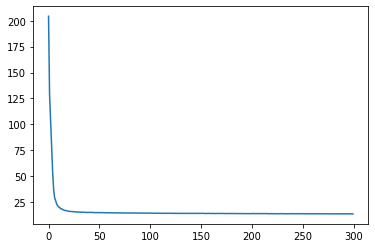

In [ ]:
loss_record = []
for epoch in range(1,epochs+1):
    total_loss = 0 
    
    for x, y in trainloader:
        output = model(x)
        loss = criterion(output, y)
        opt.zero_grad()
        loss.backward()
        opt.step()
        total_loss += loss
    
    loss_record.append(total_loss)
    if epoch % 10 == 0:
        print(total_loss)
    
plt.plot(loss_record)

In [ ]:
tp = 0
fp = 0
tn = 0
fn = 0
for x, y in testloader:
    pred = model(x)
    pred = torch.round(pred)
    
    tp += torch.sum((pred==1) & (y==1))
    fn += torch.sum((pred==0) & (y==1))
    fp += torch.sum((pred==1) & (y==0))
    tn += torch.sum((pred==0) & (y==0))
    
acc = np.array(tp+tn)/np.array((tp+tn+fp+fn))
precison = np.array(tp)/np.array((tp+fp))
recall = np.array(tp)/np.array((tp+fn))
f1_score = 2*precison*recall/(precison+recall)

In [ ]:
print(acc,precison, recall, f1_score)

0.7150038669760247 0.686219891856464 0.8021451829151504 0.7396679618509362
